# Classification model

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

**Load the dataset**

In [3]:
df = pd.read_csv("DATA/mushrooms-final.csv")

**Split data into X feature columns and y label column**

In [4]:
X = df.drop(labels="class", axis=1)
y = df["class"]

**Train | Test Split**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Encoder**

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

**Estimators**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

model_params = {
    "Logistic Regression":
    {
        "model": LogisticRegression(),
        "params":
        {
            "estimator__C": np.logspace(-4, 4, 20),
            "estimator__penalty":["l1", "l2"],
            "estimator__max_iter": [10000],
            "estimator__solver": ["saga"]
        }
    },
    "KNN":
    {
        "model": KNeighborsClassifier(),
        "params":
        {
            "estimator__n_neighbors": np.arange(1, 20, 1)
        }
    },
    "SVC":
    {
        "model": SVC(),
        "params":
        {
            "estimator__C": [0.1, 1, 10, 100, 1000],
            "estimator__gamma": ["scale", "auto", 1, 0.1, 0.01, 0.001, 0.0001],
            "estimator__kernel": ["rbf", "poly", "sigmoid"]
        }
    },
    "Decision Tree":
    {
        "model": DecisionTreeClassifier(),
        "params":
        {
            "estimator__criterion": ["gini", "entropy"],
            "estimator__max_depth": [2, 4, 6, 8, 10, 12],
        }
    },
    "Random Forest":
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "estimator__n_estimators":[10, 50, 100, 200],
            "estimator__max_features":["auto", "sqrt", "log2"],
            "estimator__max_depth": [2, 4, 6, 8, 10, 12]
        }
    },
    "Ada Boost":
    {
        "model": AdaBoostClassifier(),
        "params":
        {
            "estimator__n_estimators":[10, 50, 100, 200],
            "estimator__learning_rate":[.001, 0.01, .1, 1]
        }
    },
    "Gradient Boosting":
    {
        "model": GradientBoostingClassifier(),
        "params":
        {
            "estimator__n_estimators":[10, 50, 100, 200],
            'estimator__max_depth': [3, 4, 5, 6]
        },
    }
}

**Finding the best estimator**

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

scores=[]

for model_name, params in model_params.items():
    estimator = Pipeline([("encoder", encoder), ("estimator", params["model"])])
    grid = GridSearchCV(estimator=estimator, param_grid=params["params"], cv=3, scoring="accuracy")
    grid.fit(X_train,y_train)
    scores.append([model_name,dict(grid.best_params_), grid.best_score_])

model_scores=pd.DataFrame(scores, columns=["Model", "Parameters", "Score"]).sort_values(by="Score", ascending=False, ignore_index=True)

In [9]:
model_scores

,Model,Parameters,Score
0,Decision Tree,"{'estimator__criterion': 'gini', 'estimator__m...",0.998987
1,SVC,"{'estimator__C': 0.1, 'estimator__gamma': 1, '...",0.998734
2,Random Forest,"{'estimator__max_depth': 10, 'estimator__max_f...",0.997975
3,Gradient Boosting,"{'estimator__max_depth': 6, 'estimator__n_esti...",0.997974
4,KNN,{'estimator__n_neighbors': 1},0.994936
5,Logistic Regression,"{'estimator__C': 1.623776739188721, 'estimator...",0.966078
6,Ada Boost,"{'estimator__learning_rate': 1, 'estimator__n_...",0.945318


**Train the best model**

In [10]:
model_scores.iloc[0].to_dict()

{'Model': 'Decision Tree',
 'Parameters': {'estimator__criterion': 'gini', 'estimator__max_depth': 12},
 'Score': 0.9989872134252495}

In [11]:
model = Pipeline([
    ("encoder", encoder), 
    ("estimator", DecisionTreeClassifier(criterion="gini", max_depth=12))
    ])

model.fit(X_train, y_train)

Pipeline(steps=[('encoder', OneHotEncoder()),
                ('estimator', DecisionTreeClassifier(max_depth=12))])

**Evaluate the model**

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1049
           p       1.00      1.00      1.00       645

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



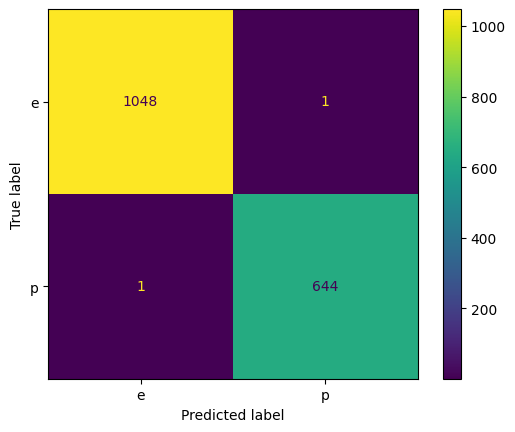

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

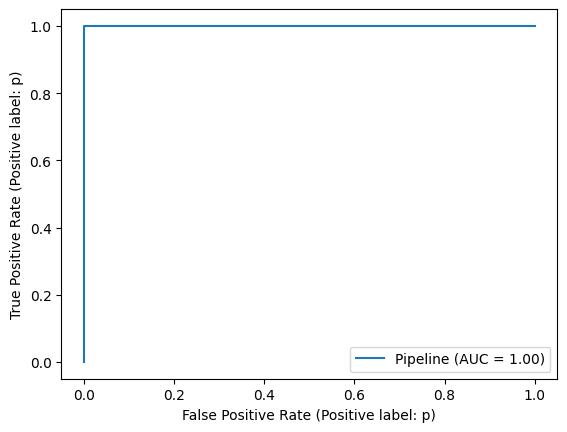

In [15]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)

**Saving the model**

In [16]:
model.fit(X, y)

Pipeline(steps=[('encoder', OneHotEncoder()),
                ('estimator', DecisionTreeClassifier(max_depth=12))])

In [17]:
from joblib import dump
dump(model, '../model/model.joblib') 

['../model/model.joblib']